# Python for Data Analysis - FINAL PROJECT 2022

### DIA 1 - HIEN Victor - LUTTENBACHER Léa - MENU Victor

### Database

- Estimation of obesity levels based on eating habits and physical condition Data Set

- Link to the Data set : https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

- Information : This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

- Link to the study : https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

In [1]:
#All import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix, classification_report,make_scorer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

### 1) Exploration of the data set and data

In this first part, our objective will be to explore the data set, to understand its data as well as its variables, and the link between each of them. This step is necessary to be able to carry out an effective data preparation: the data pre-processing.

In [3]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [4]:
# How many data and variables make up our data set ?
data.shape

(2111, 17)

In [5]:
# We are now trying to find out if there are missing values in this data set
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There isn't missing values, it can be explained simply: 
Indeed, 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, and the other 23% of the data was collected directly from users through a web platform.

In [6]:
# What are the variables and what do they correspond to?
#df.columns
print(data.dtypes)
print("\n")
print(data.dtypes.value_counts())

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


object     9
float64    8
dtype: int64


Here we can observe the 17 variables present in our dataset.
We will now explain the correspondence of each of these variables, according to their type (quantitative or qualitative).

- Our 8 quantitative variables (float64 type):
    - Age: The person's age in years
    - Height: The height of the person in meters
    - Weight: The person's weight in kilograms
    - FCVC: Frequency of consumption of vegetables by scale 
    - NCP: Number of main meals daily
    - CH2O: Consumption of water daily 
    - FAF: Physical activity frequency weekly
    - TUE: Time using technology devices daily
    
We can see that in the quantitative variables, some have already been encoded according to the answers to the questionnaire which can be seen here: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
We will therefore use this for the rest and for our understanding of the data set.
    
- Our 9 qualitative variables (type object):
    - Gender: The gender of the person
    - Family_history_with_overweight: Whether or not there is a family history of obesity
    - FAVC: Frequent consumption of high caloric food
    - CAEC: Consumption of food between meals
    - SMOKE: Is the person a smoker or not
    - SCC: Calories consumption monitoring daily
    - CALC: Consumption of alcohol 
    - MTRANS: Transportation used
    - NObeyesdad: Obesity category

In [7]:
# To get a general overview of our qualitative variables, here we can see all the answer possibilities present in the data set,
# and their repartition.

for i in data.select_dtypes('object').columns:
    print(f'{i}:')
    print('Count: \n', data[i].value_counts(), '\nPercentage: \n', data[i].value_counts(normalize=True)*100, '\n')


Gender:
Count: 
 Male      1068
Female    1043
Name: Gender, dtype: int64 
Percentage: 
 Male      50.592136
Female    49.407864
Name: Gender, dtype: float64 

family_history_with_overweight:
Count: 
 yes    1726
no      385
Name: family_history_with_overweight, dtype: int64 
Percentage: 
 yes    81.762198
no     18.237802
Name: family_history_with_overweight, dtype: float64 

FAVC:
Count: 
 yes    1866
no      245
Name: FAVC, dtype: int64 
Percentage: 
 yes    88.394126
no     11.605874
Name: FAVC, dtype: float64 

CAEC:
Count: 
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 
Percentage: 
 Sometimes     83.609664
Frequently    11.463761
Always         2.510658
no             2.415917
Name: CAEC, dtype: float64 

SMOKE:
Count: 
 no     2067
yes      44
Name: SMOKE, dtype: int64 
Percentage: 
 no     97.91568
yes     2.08432
Name: SMOKE, dtype: float64 

SCC:
Count: 
 no     2015
yes      96
Name: SCC, dtype: int64 
Percentage: 
 no

We can see here that the SMOKE and SCC variables will not necessarily be representative, due to the too small number of positive responses (<5%). We can then question the relevance of their use in our study.

In [8]:
# To get a general overview of our quantitative variables, here we can use describe to see the min, max, quartiles and averages
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### 2) Data pre-processing

In this second part, we will prepare the data so that they can then be used. Thanks to the previous part, we were able to see and understand our data. Now, we are going to prepare the data set so that it can be easily used later.

In [9]:
df = data.copy()

In [10]:
# We will already replace the name of the columns to make it easier to understand.
df.columns = [
    'Gender', 
    'Age', 
    'Height', 
    'Weight', 
    'Family History with Overweight',
    'Frequent Consumption of High Caloric Food', 
    'Frequency of Consumption of Vegetables', 
    'Number of Main Meals', 
    'Consumption of Food between Meals', 
    'Smoke', 
    'Consumption of Water Daily', 
    'Calories Consumption Monitoring', 
    'Physical Activity Frequency', 
    'Time using Technology Devices',
    'Consumption of Alcohol', 
    'Transportation Used', 
    'Level of Obesity']                        

In [11]:
df.head(3)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time using Technology Devices,Consumption of Alcohol,Transportation Used,Level of Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


Now, by observing the variables and the data present, we have decided to make some 'modifications' to allow us to better exploit the data.

In [12]:
# First, for the sake of understanding and readability, we will replace the '_ 'by ' '
df['Level of Obesity'] = df['Level of Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation Used'] = df['Transportation Used'].apply(lambda x: x.replace('_', ' '))

# Next, we will round off age, height and weight to allow for clearer operation later. 
# In addition, we change the height from meters to centimeters.
df['Age'] = df['Age'].round(1)
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)

# Finally, we can notice that some continuous values should not be given the 'meaning' and content they represent.
# This is explained by the fact that 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 
# which means that decimal numbers could appear while a real answer would only have whole values.
df['Frequency of Consumption of Vegetables'] = df['Frequency of Consumption of Vegetables'].round()
df['Number of Main Meals'] = df['Number of Main Meals'].round()
df['Consumption of Water Daily'] = df['Consumption of Water Daily'].round()
df['Physical Activity Frequency'] = df['Physical Activity Frequency'].round()
df['Time using Technology Devices'] = df['Time using Technology Devices'].round()

Moreover, as we are studying weight and obesity, an interesting element to exploit may be the BMI (IMC in French), a universally used variable which makes it possible to categorize the degree of obesity.

The BMI is calculated with the following formula: BMI = Weight / Height^2

After that, we were able to make a connection between BMI and the level of obesity:
- Under Weight: less than 18.5
- Normal Weight: 18.5 & 24.9
- Over Weight: between 25.0 & 29.9
- Obesity I: between 30.0 & 34.9
- Obesity II: between 35.0 & 39.9
- Obesity III: higher than 40

In [13]:
# We add IMC to our dataframe
IMC = df["Weight"]/((df["Height"]/100)**2)
df.insert(loc = 1, column='IMC', value=IMC)
df['IMC'] = df['IMC'].round(2)

Finally, in order to prepare the data for future graphs and operations, we found it relevant to do some encoding for our qualitative variables.

In [14]:
# Encoding this values, and decoding other values in separate copy of the data set
def encoding_function(df):
    encode = {
            'Insufficient Weight': 0,
            'Normal Weight': 1 ,
            'Overweight Level I': 2 ,
            'Overweight Level II': 3,
            'Obesity Type I': 4,            
            'Obesity Type II': 5,
            'Obesity Type III': 6,
        
            'yes': 1,
            'no': 0,
        
            'Female': 1,
            'Male': 0,
        
            'Sometimes': 1,
            'Frequently': 2,
            'Always': 3,
        
            'Automobile': 1,
            'Motorbike': 2,
            'Bike': 3, 
            'Public Transportation': 4,
            'Walking': 5
           }
    
    for column in df.select_dtypes('object').columns:
        df.loc[:,column] = df[column].map(encode)  
    return df

def decoding_function(df):
    decode1 = {
            1:'Never',
            2:'Sometimes',
            3:'Always'
           }
    
    decode2 = {
            1:'1', 
            2:'2',
            3:'3',
            4:'3+'
           }
    
    decode3 = {
            1:'Less than 1L', 
            2:'Between 1 and 2L',
            3:'More than 2L'
           }
    
    decode4 = {
            0:"I don't have",
            1:'1 or 2 days',
            2:'2 or 4 days',
            3:'4 or 5 days'
           }
    
    decode5 = {
            0:'0–2 hours',
            1:'3–5 hours',
            2:'More than 5 hours'
           }
    
    df.loc[:,'Frequency of Consumption of Vegetables'] = df['Frequency of Consumption of Vegetables'].map(decode1)  
    df.loc[:,'Number of Main Meals'] = df['Number of Main Meals'].map(decode2)  
    df.loc[:,'Consumption of Water Daily'] = df['Consumption of Water Daily'].map(decode3)  
    df.loc[:,'Physical Activity Frequency'] = df['Physical Activity Frequency'].map(decode4)  
    df.loc[:,'Time using Technology Devices'] = df['Time using Technology Devices'].map(decode5)  
    return df

dfe = df.copy()
dfe = encoding_function(dfe)

dfe2 = df.copy()
dfe2 = decoding_function(dfe2)

In [15]:
dfe.head(3)

,Gender,IMC,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time using Technology Devices,Consumption of Alcohol,Transportation Used,Level of Obesity
0,1,24.39,21.0,162.0,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,4,1
1,1,24.24,21.0,152.0,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,4,1
2,0,23.77,23.0,180.0,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,4,1


In [16]:
dfe2.head(3)

,Gender,IMC,Age,Height,Weight,Family History with Overweight,Frequent Consumption of High Caloric Food,Frequency of Consumption of Vegetables,Number of Main Meals,Consumption of Food between Meals,Smoke,Consumption of Water Daily,Calories Consumption Monitoring,Physical Activity Frequency,Time using Technology Devices,Consumption of Alcohol,Transportation Used,Level of Obesity
0,Female,24.39,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2L,no,I don't have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,24.24,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.77,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight


### 3) Data vizualisation
Now that our data is prepared, we will visualize this data to understand and observe the relationships and importance of the different variables, the distribution of the data and the general overview of our data set.The objective of this part is therefore to determine which variables we will keep for the modeling part.

First, we will try to get an overview of the data set. Here we observe the distribution in our data set. The objective is to understand what is the composition in our dataset and to start to see correlations between some variables, which could be useful later.

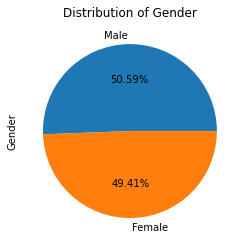

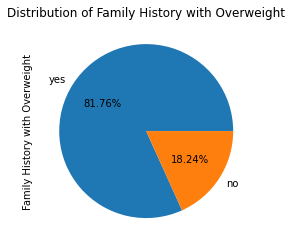

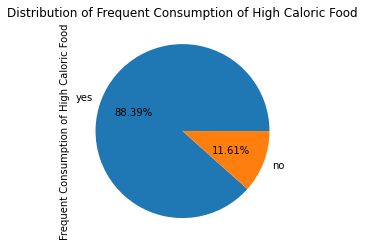

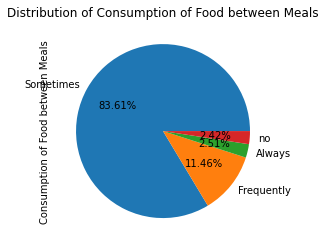

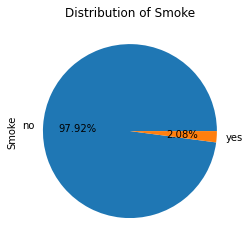

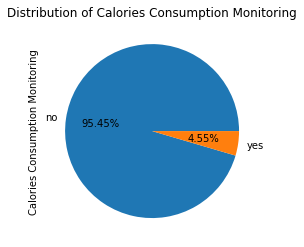

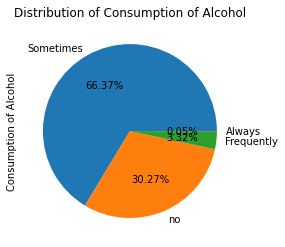

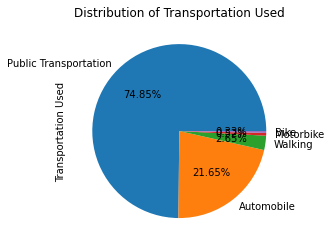

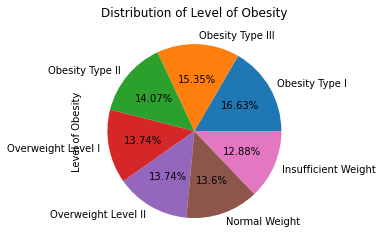

In [17]:
#
for column in df.select_dtypes('object'):
    plt.figure()
    df[column].value_counts().plot.pie(normalize = True, autopct = lambda x: str(round(x,2))+'%')
    plt.title(f'Distribution of {column}')

Observation:

- We can observe that there are as many female as male responses as the gender distribution is quite balanced.

- Then we can see that more than one in eight people in the study have a history of being overweight in their family.

- Almost 9 out of 10 people in the study frequently eats high caloric food.

- Concerning the consumption of food between meals, we can see that the extremes "no" and "always" are the least represented (2%). 1 in 10 people in the study eat frequently between meals. Finally, more than 8 out of 10 people eat sometimes between meals.

- Almost all the people in the dataset do not count their calories.

- Almost all the people in the study do not smoke.

- The vast majority of people in the study sometimes drink alcohol and 1 in 3 people do not drink alcohol.

- Almost all of our sample does not make any physical effort to move as more than 7 out of 10 people use public transport and 2 out of 10 people use their car. 

- Finally, we observe that the different weight categories are equally represented, i.e. there are the same number of people per category. It should be noted that there are more people with obesity type 1 and fewer people with insufficient weight.

Conclusion:

We can conclude that the typical person in our dataset is a man of "Obesity Type 1" with a history of obesity in his family who does not smoke, sometimes drinks alcohol but frequently eats high calorie foods and doesn't count his calories and sometimes nibbles between meals and uses public transport to get around.

Moreover, we can see that some variables seem interesting to exploit, such as gender, family history, caloric food and vegetable consumption... while others will not be representative, such as smoking or counting calories...

C:\Users\lealu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lealu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lealu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

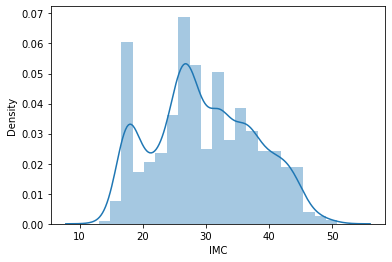

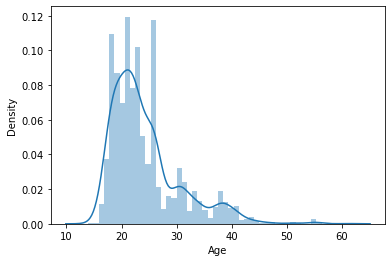

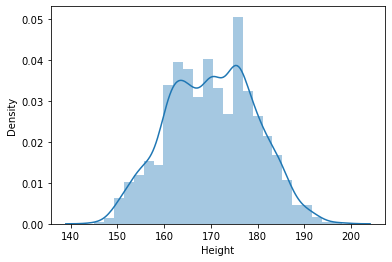

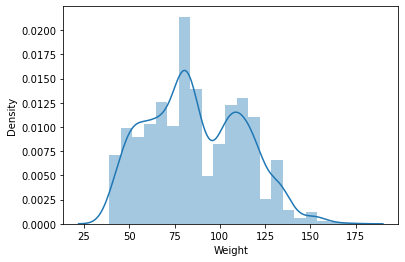

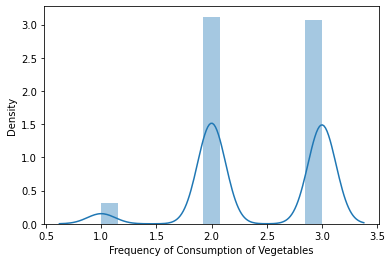

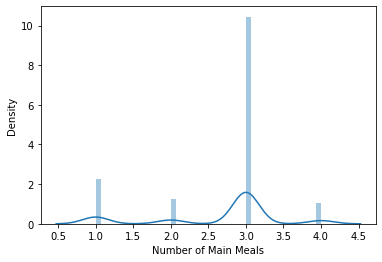

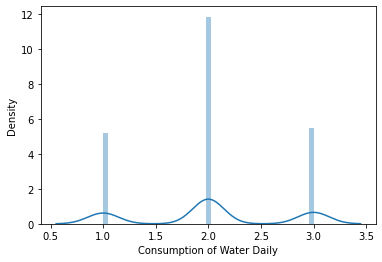

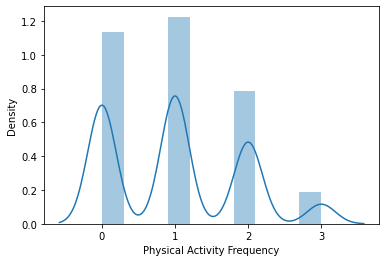

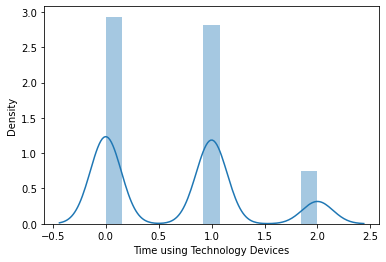

In [18]:
#We keep on visualizing the variable and the repartition of our datset by checking the density of different variable.
for column in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[column])

Observation :
Beware, some of the graphs may look 'strange' but it is important to look at the density, as some of the survey questions had pre-selected answers.

- Density of IMC
We can see that the IMC is rather well distributed, this confirms what we have seen before with the distribution of the level of obesity which is itself well distributed. Indeed, these variables are directly influenced because the BMI makes it possible to categorize people according to their level of obesity.
We can see that there is a big density around 18, this is logical because is correspond to the average, normal IMC. We also have a big density around 28.

- Density of age
This graphic allows us to clearly visualize the age distribution in our dataset. We see that most of our population is distributed between 17 and 25 years old. A rather young population. With very few people over 40. 

- Density of weight
This is directly linked with IMC and level of Obesity, we have the same conclusion. And all alone, it's not really representative, it depends of the height of the people.

- Frequency of Cunsumption of Vegetables
Vegetable consumption seems to be an important variable, 1 corresponds to Never, 2 Sometimes, 3 to Always. It can be seen that most people consume vegetables at least once in a while or even always. Which is quite interesting. We can assume that people tend to respond sometimes or always more easily even if they don't eat vegetables so frequently.

- Number of main meal
We have a small proportion of people who say they eat one meal a day, very few for 2 and 4. And obviously a very high density of people taking 3 meals a day, which corresponds to the global standard. This variable does not seem to be usable as the other frequencies are small (especially compared to the frequency of 3 meals per day).

- Consumption of Water Daily
This graph allows us to see that the density of water consumption is well distributed with a majority of people who consume an average of 2 liters of water per day.

- Physical Activity Frequency
A rather balanced distribution which just shows that a large majority does not do any or very little sport.

- Time using Technology Devices
Rather balanced distribution that does not directly highlight any pattern

Conclusion:

These different graphs allow us to better understand our data and how the participants in our study are distributed. We can thus observe that there is no real data or participants at an extremity that could distort our results. 

We find that the variable 'BMI' and the variable 'Level of Obesity' are rather interesting to exploit and to compare with the other variables, because they will allow us to obtain a new overview of the different variables according to their level of obesity (and thus directly of their BMI).

Thus, we are going to make a boxplot here, allowing us to have a visual on the distribution but also the quartiles and medians and means of the variables.

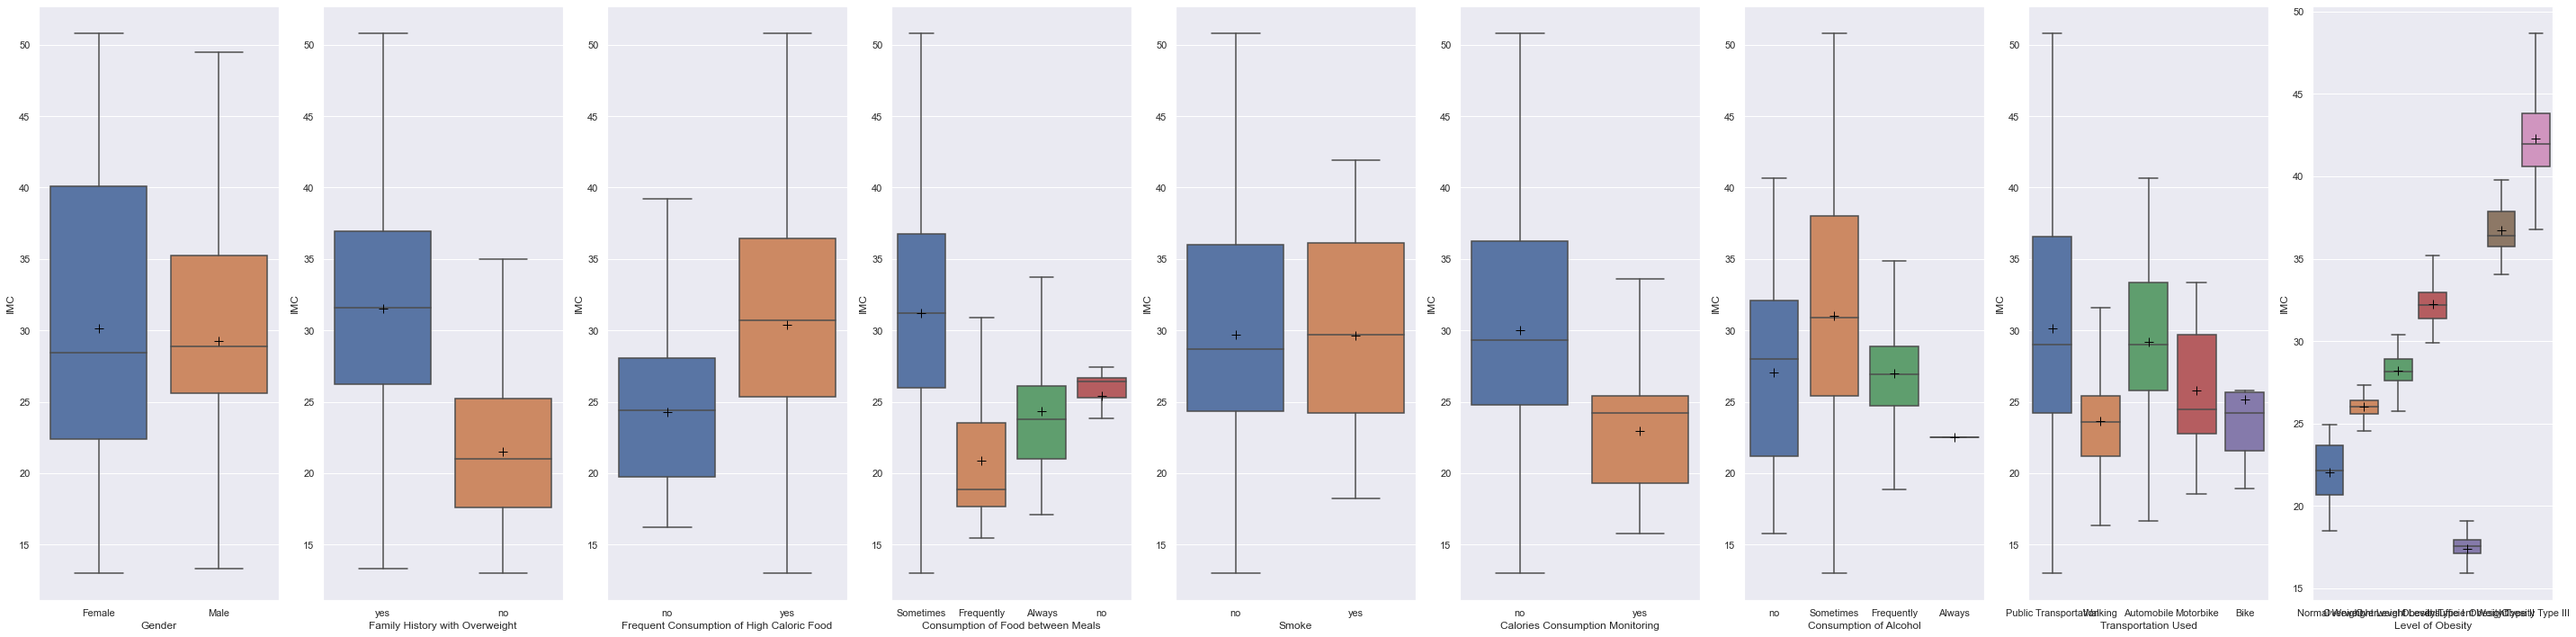

In [19]:
sns.set()
fig = plt.figure(figsize=(40,10))
x = 1
y = 1
for column in df.select_dtypes('object'): 
    plt.subplot(y, 9, x)
    sns.boxplot(x=column, y='IMC', data=df, showfliers=False, showmeans=True,  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    x=x+1
fig.tight_layout()

Observation:

We can see that the male-female distribution is roughly the same, although in our study men have a greater variety of CIs
- We can also clearly see that family history is important, because those who do not have a family history are not obese in majority, while those who do have a family history are easily found with a BMI above 30. 
- It is also observed that diet has an impact and encourages obesity with the consumption of high caloric food, alcohol and snacking between meals.
- Smoking or not is not representative here.
- Counting calories seems to be complicated to interpret since the vast majority do not do so.
- Finally, the means of transportation may be interesting to study, as those who use public and private transportation have on average a higher BMI than those who walk.

Conclusion: 

Thanks to these barplots, we can visually observe and deduce a certain correlation between different variables. Our intuition to choose the level of obesity as a target seems to be confirmed here in view of the relevance of the information we can see above.

We made a global heatmap of the different variables to be able to observe the correlations. We are most interested in the obesity level variable, so we look at which variables seem to be most correlated with it (the last line in particular).

<AxesSubplot:>

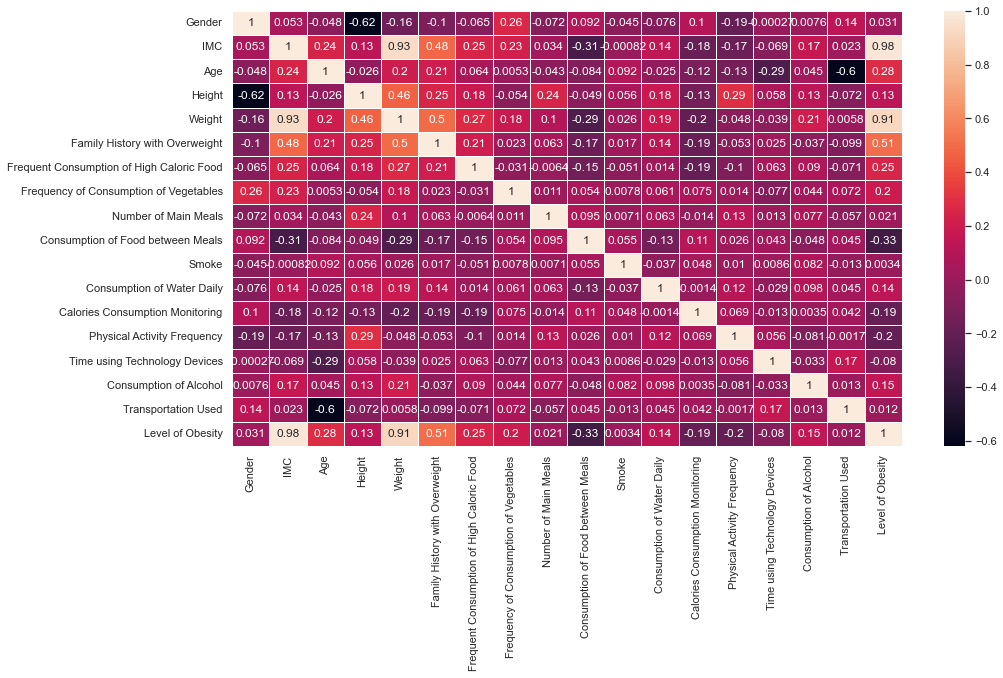

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(dfe.corr(),annot = True,linewidths=.5)

- Observation of the Relationship between the level of obesity and the other variables :

    We can see that age is well correlated with the level of obesity which is logical, our physical shape evolves with time. Obviously a very high correlation with weight. 
    A fairly high correlation with family history. 
    Then we have another interesting correlation between the level of obesity and the frequency of consumption of high caloric food, consumption of vegetables, water daily and alcohol.
    For the rest of the variables we see that their link with the level of obesity is not very important. 

    This heatmap allows us to make a new selection of interesting variables, we will visualize the most interesting variables afterwards to see their impact on the level of obesity.


- Conclusion : The most intersting variable seems to be:
    - family history
    - frequency of consumption of high caloric food 
    - consumption of vegetables
    - consumption of water daily
    - consumption of alcohol

In this graphics we show the distribution of the different levels of obesity according to the other variables.

C:\Users\lealu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lealu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lealu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

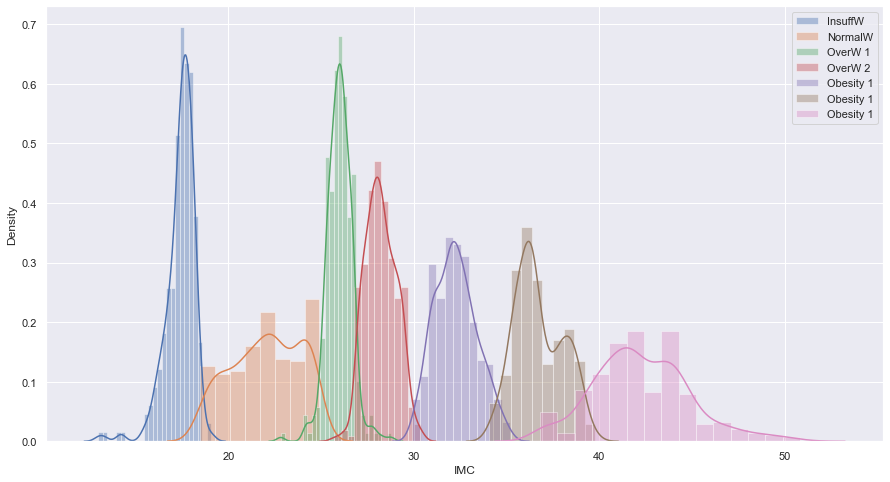

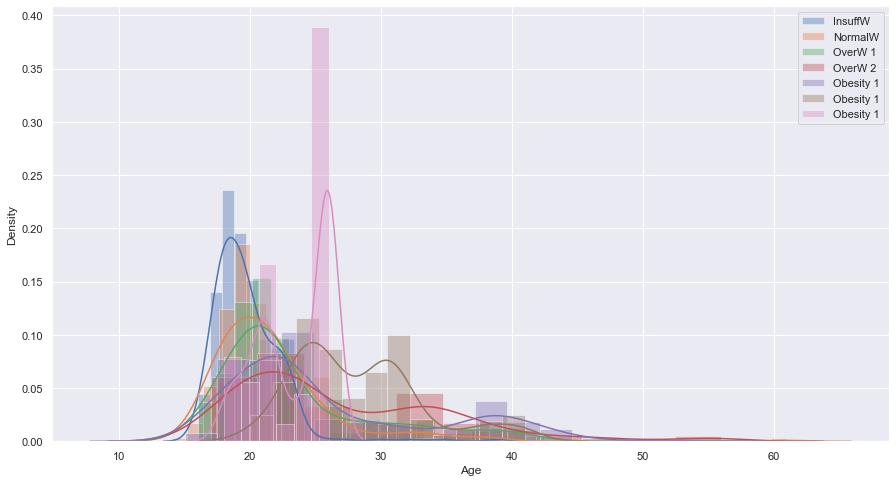

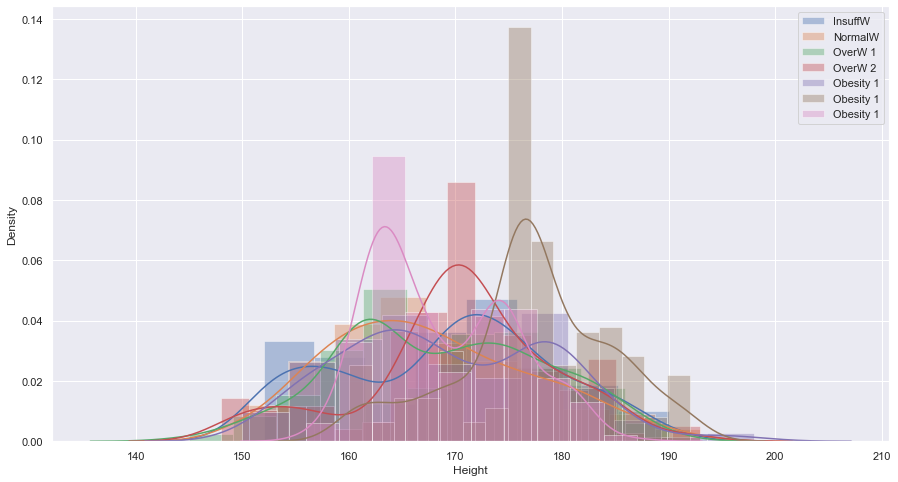

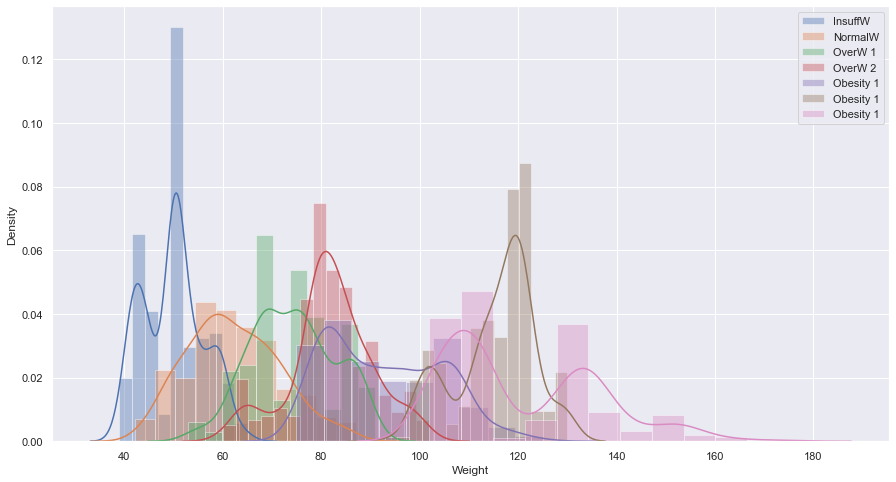

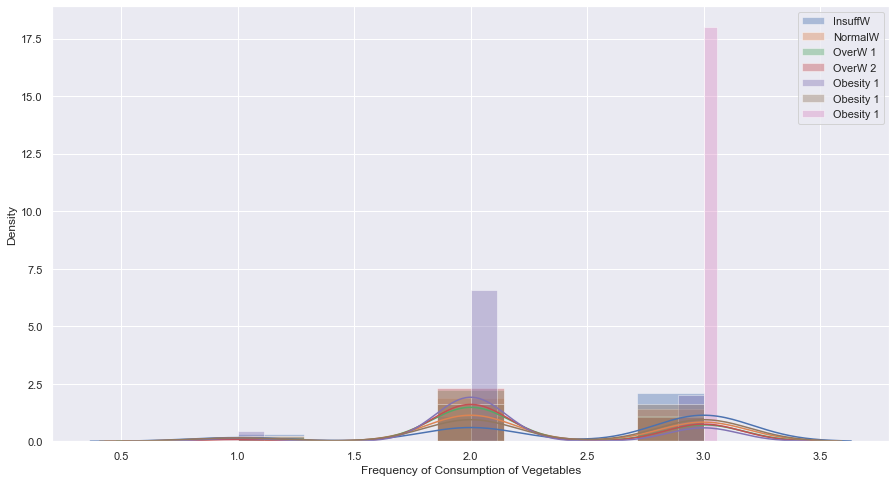

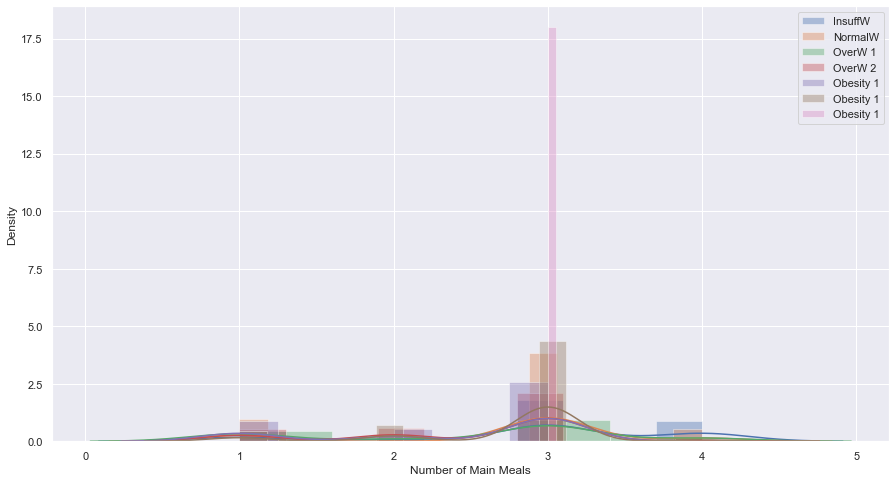

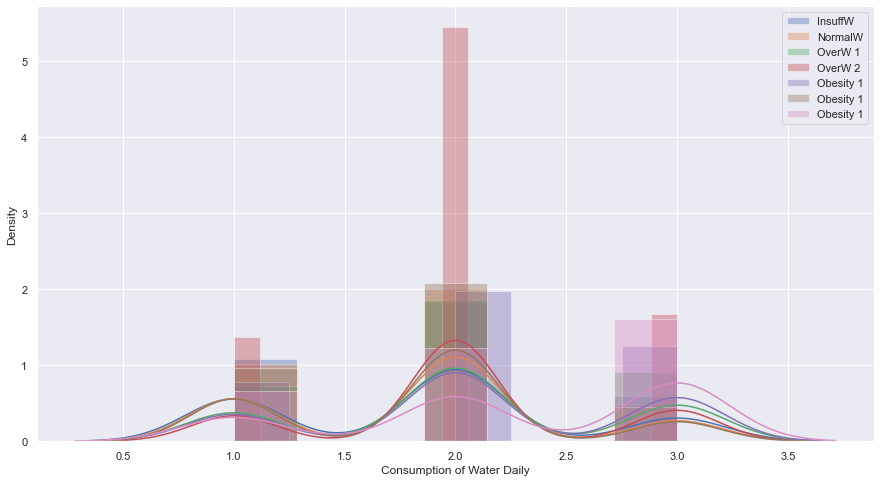

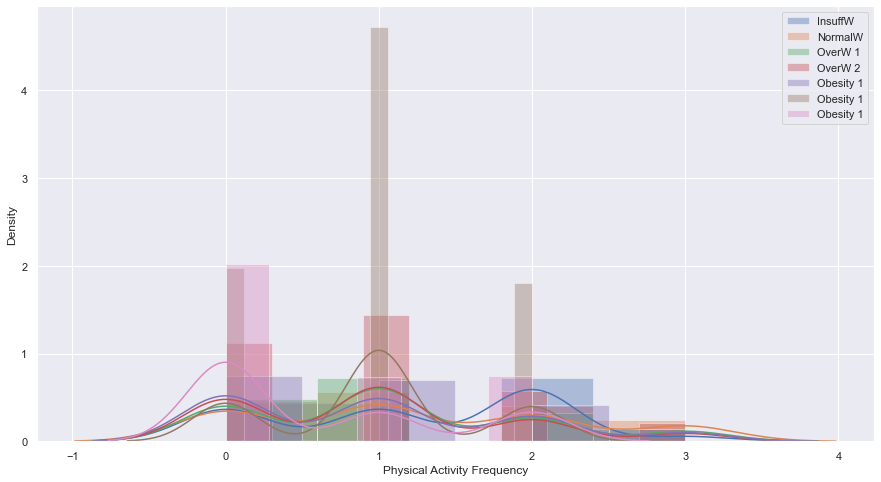

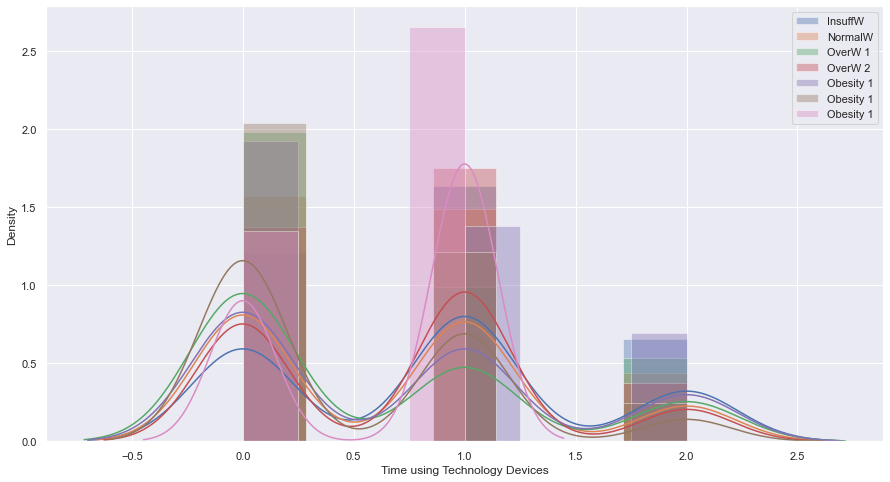

In [21]:
for column in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[df['Level of Obesity']== 'Insufficient Weight'][column], label = 'InsuffW')
    sns.distplot(df[df['Level of Obesity']== 'Normal Weight'][column], label = 'NormalW')
    sns.distplot(df[df['Level of Obesity']== 'Overweight Level I'][column], label = 'OverW 1')
    sns.distplot(df[df['Level of Obesity']== 'Overweight Level II'][column], label = 'OverW 2')
    sns.distplot(df[df['Level of Obesity']== 'Obesity Type I'][column], label = 'Obesity 1')
    sns.distplot(df[df['Level of Obesity']== 'Obesity Type II'][column], label = 'Obesity 1')
    sns.distplot(df[df['Level of Obesity']== 'Obesity Type III'][column], label = 'Obesity 1')
    plt.legend()

We find what we deduced above with the age which when it increases, the level of obesity tends to increase.
We also see that height and BMI are well related to the level of obesity, which remains logical.

For the rest of the variables, the graphs with the daily water consumption, the physical actvity frequency and the time using technology, number of main meals, frequency of consumption of vegetables, it is difficult to find a real link with these variables and the obesity level. The data are not clear enough: there are too few possible answers, so the differences are not large enough to draw conclusions. 

We will make new graphs with the variables we have selected above to try to better visualize their link with the level of obesity.

We decided to focus on the Level of Obesity in order to better understand our data set and to make logical inferences. We then made a heatmap between the level of obesity and all the other variables to see if they are correlated and where we should focus our attention.

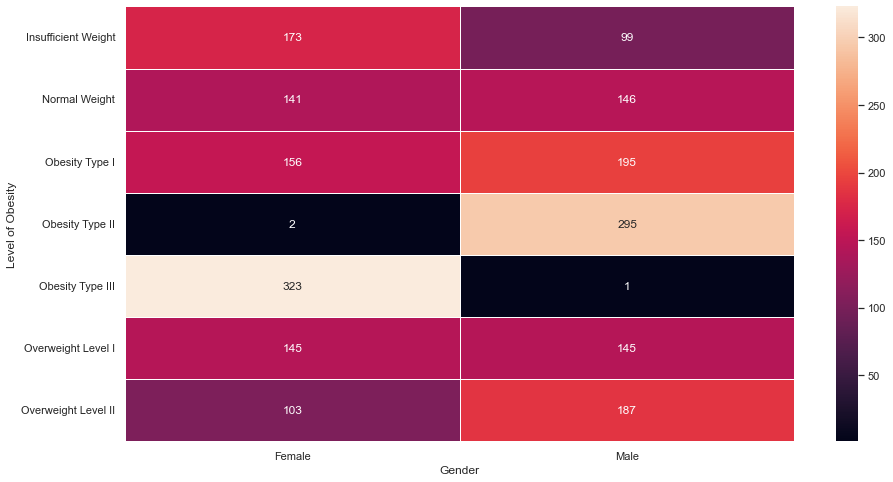

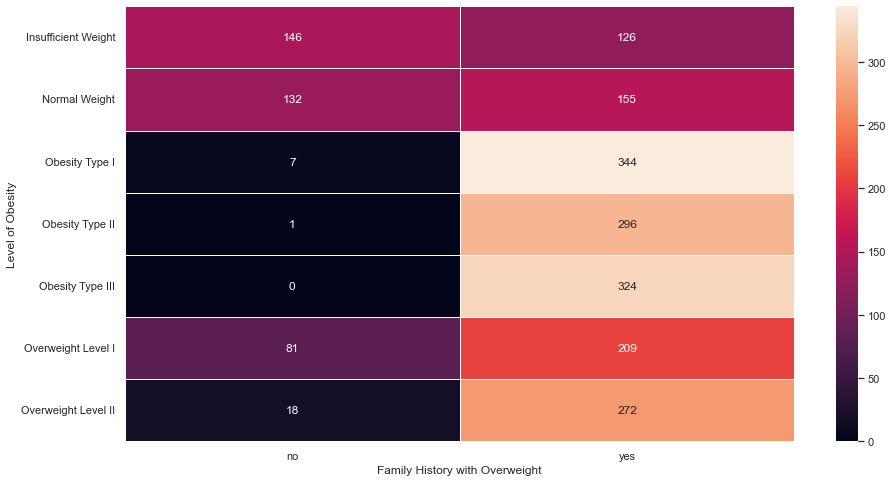

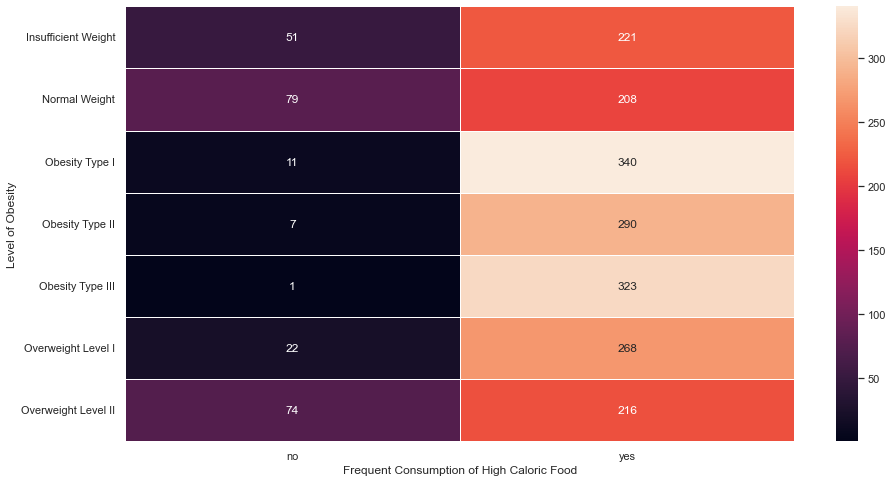

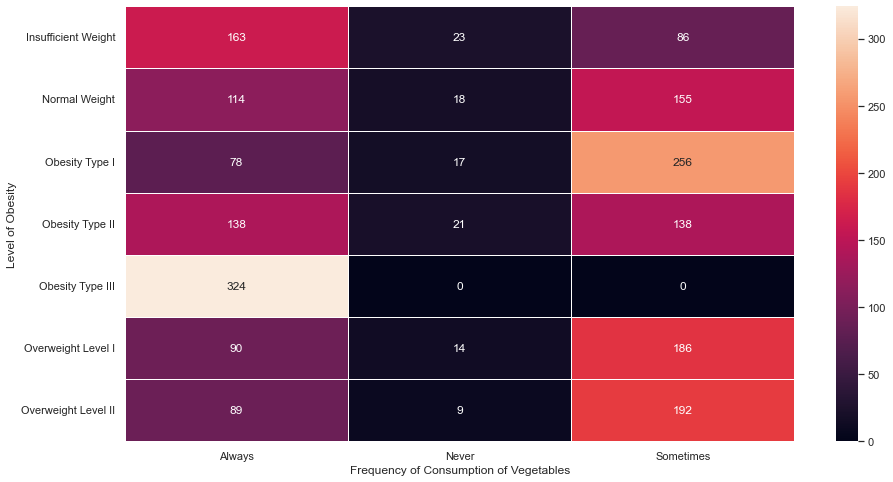

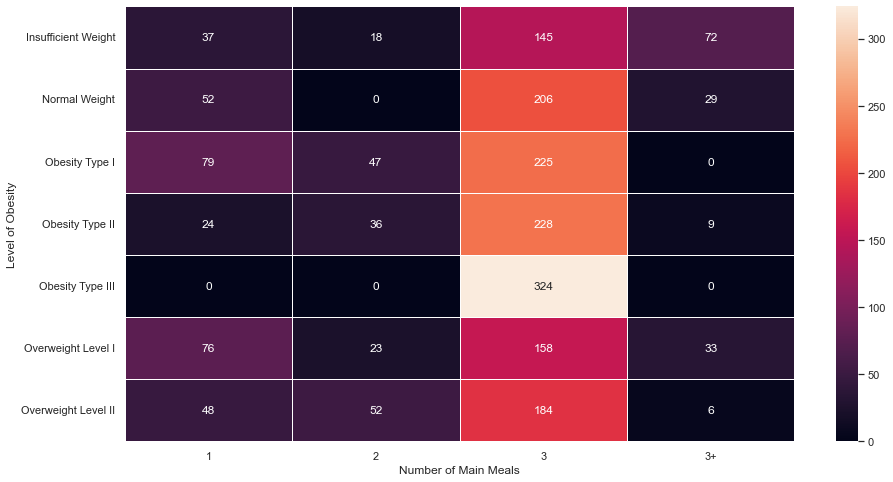

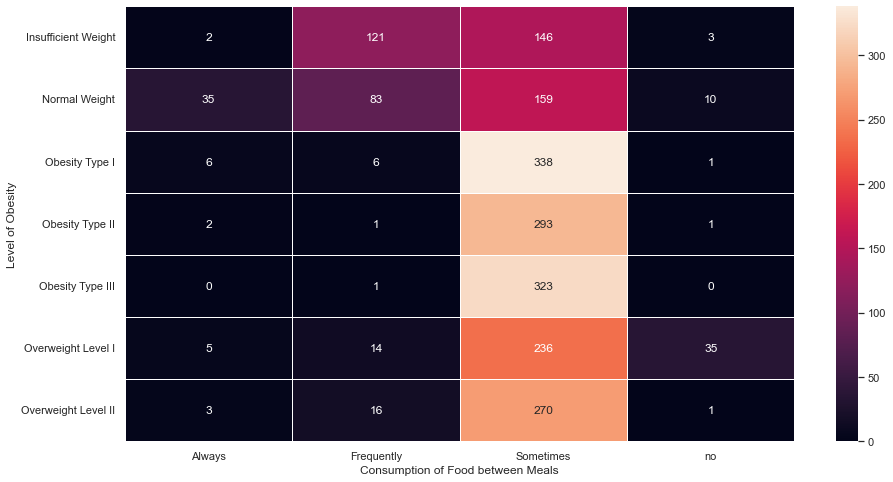

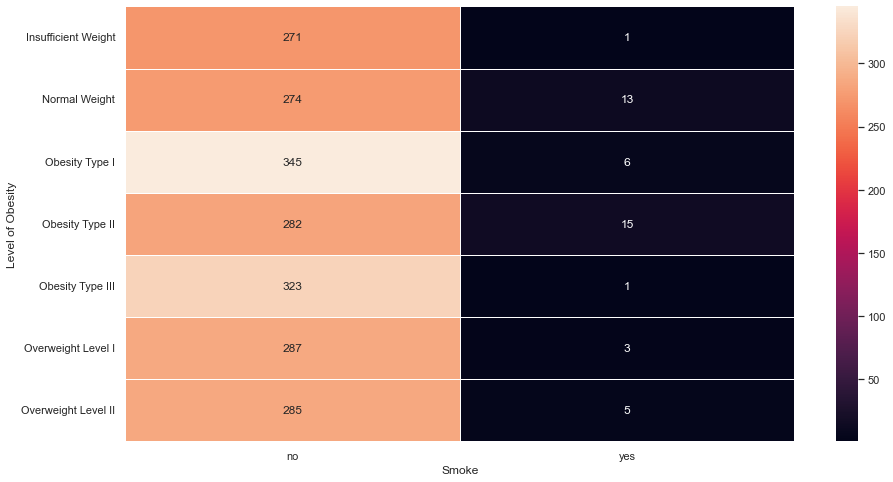

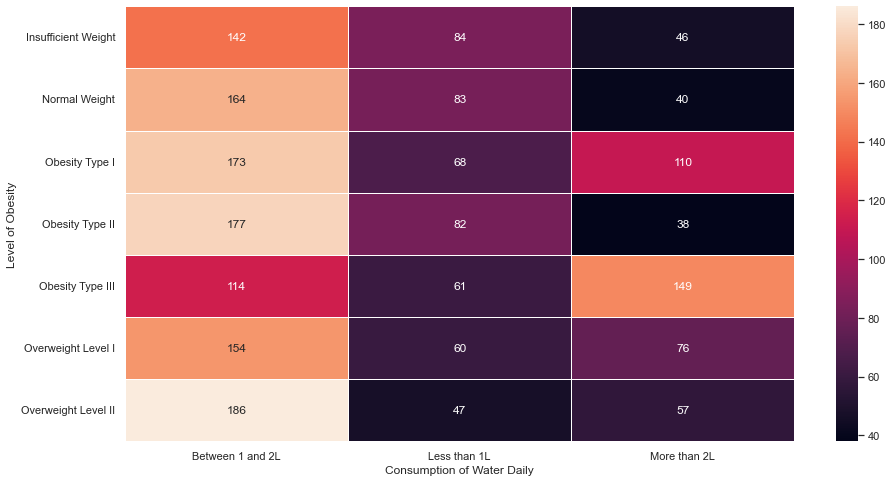

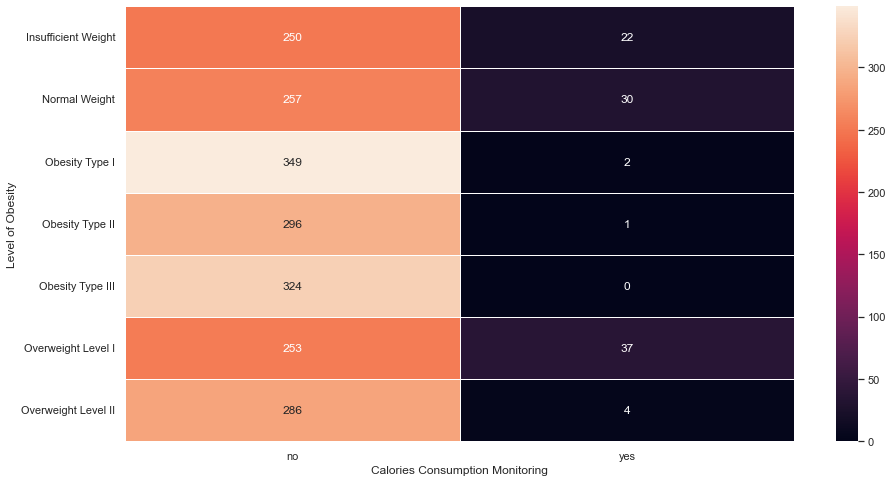

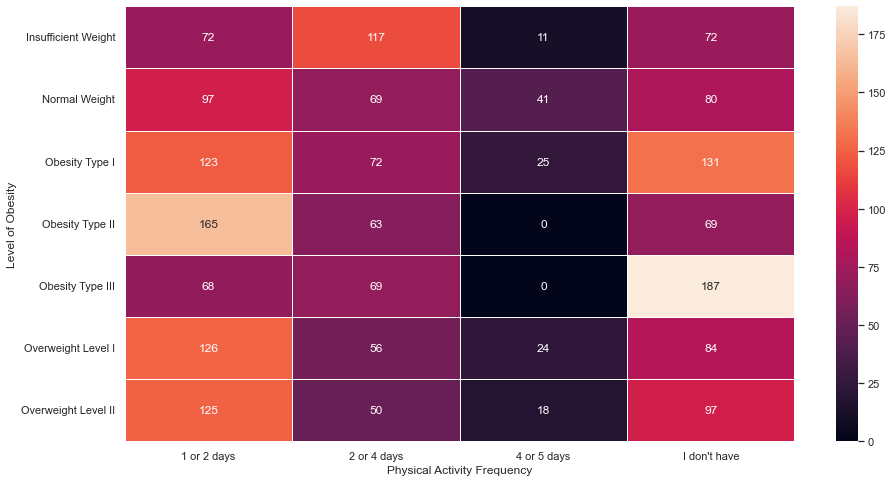

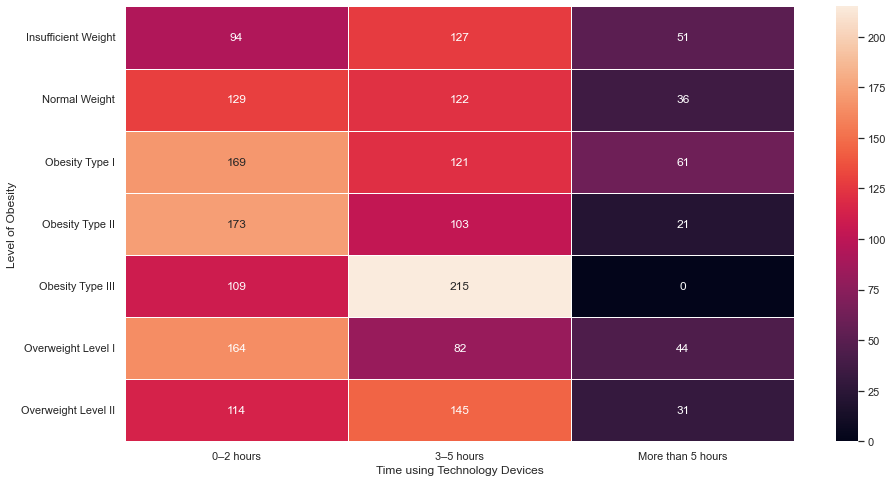

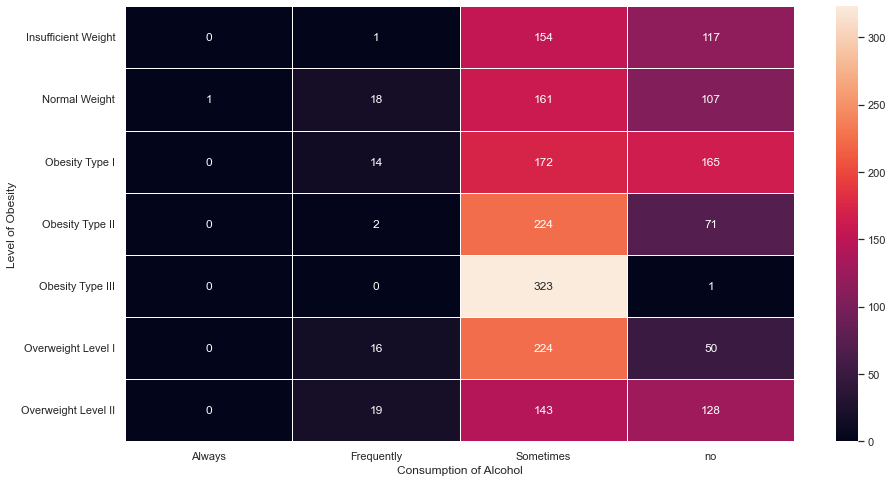

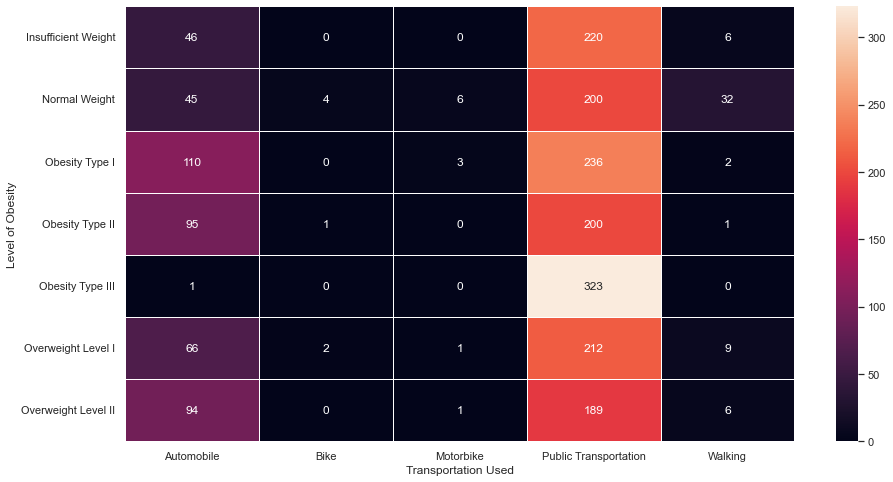

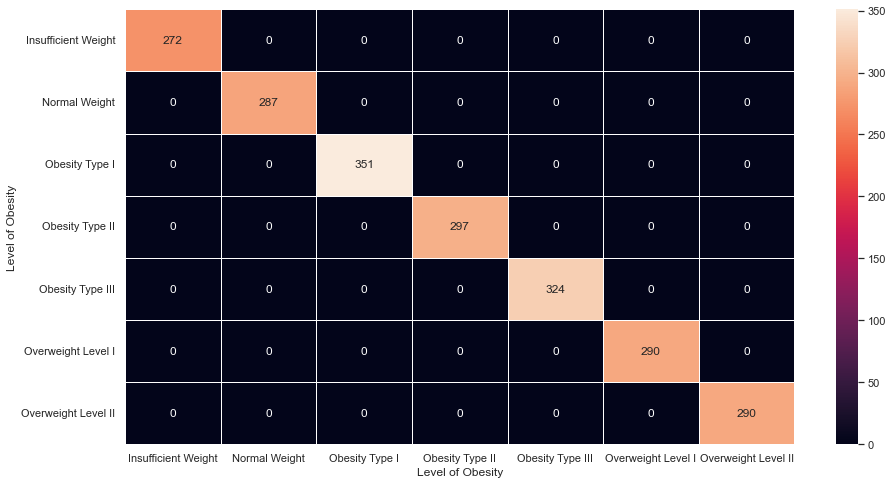

In [22]:
for column in dfe2.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(dfe2['Level of Obesity'],dfe2[column]),annot = True, fmt='d', linewidths=1) 

Observation:
- We see that women are more likely to be insufficient weight. The vast majority of Obesity Type II's are male, while the vast majority of Obesity Type III's are female.

- We then see that there is a strong correlation between family history overweight and the level of obesity. From the level of obesity level I until overweight level II, most of the people have family history overweight.
There is also a clear correlation between the level of obesity and frequent consumption of high caloric food, 

- The number of meals is mostly 3 for everyone and the frequency of food consumption between meals is also the same everywhere. Most people in the dataset do not smoke.

Conclusion:

These heatmaps make it easier to see the different relationships between each level of obesity and the variables. It can be observed that some variables are not exploitable, not sufficiently demarcated between the different levels of obesity.

This study only confirms our interest in taking the Level of Obesity as a target variable.

We have seen that the level of obesity and family history of overwight were well linked, so we will visualise this. 


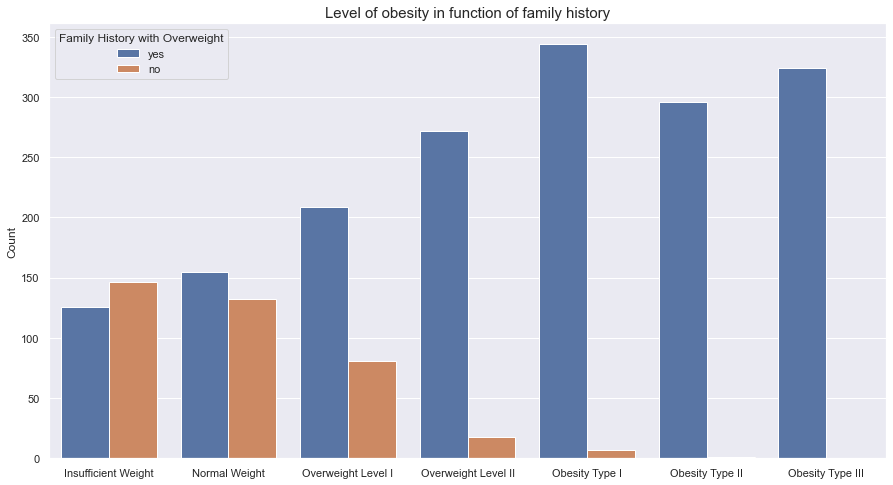

In [23]:
plt.figure(figsize=(15,8))

sns.countplot(x='Level of Obesity',data=df,hue='Family History with Overweight',
            order=['Insufficient Weight','Normal Weight','Overweight Level I',
'Overweight Level II','Obesity Type I','Obesity Type II','Obesity Type III'])

plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Level of obesity in function of family history',fontsize=15)
plt.show()

Observation: 

This graph shows that above a certain level of obesity, overweight level I, the majority of people have a family history of being overweight. And as the level of obesity increases, so does the proportion of people with a family history of overweight.
Furthermore, all people of obesity type II and II (people with the highest level of obesity) have a family history of overweight.

Conclusion:

We can therefore conclude that having a family history of overweight largely favours obesity.
If a person has a family history of overweight he or she has to be even more careful about what he or she does to avoid becoming obese

Now we will try to see if there is really a usable correlation between age and BMI. We also add gender for a general overview

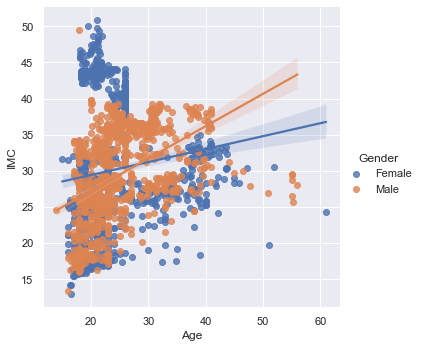

In [24]:
cora = sns.lmplot(x="Age", y="IMC", hue="Gender", data=df)
cora.set_axis_labels("Age", "IMC")

Observation:

With this graph, which may seem a bit 'messy', we can draw some interesting conclusions for the understanding of our study. Indeed, we can already see that with age, the BMI (and thus the level of obesity) tends to increase, and this more strongly in men. Moreover, we can see that if the distribution of data around 20 years has a wide range of BMI; this decreases with time and the data tend to converge to a BMI of 30 from 30 years.

Conclusion:

Age plays a more or less direct role in the level of obesity, but since getting older does not imply weight gain, we can assume that behind this observation lies other things in lifestyle habits.

In order to understand the link between the variables and the level of obesity, we are interested in the frequent consumption of high-calorie foods.

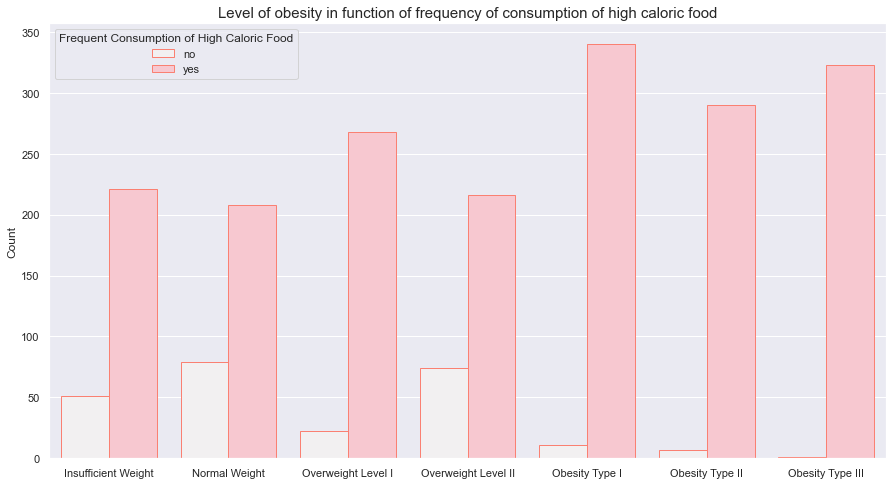

In [25]:
plt.figure(figsize=(15,8))

sns.countplot(x='Level of Obesity',data=df,hue='Frequent Consumption of High Caloric Food',
            order=['Insufficient Weight','Normal Weight','Overweight Level I',
    'Overweight Level II','Obesity Type I','Obesity Type II','Obesity Type III'], color = "pink", edgecolor = 'salmon')

plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Level of obesity in function of frequency of consumption of high caloric food',fontsize=15)
plt.show()

Observation:

Here the observations are relatively equivocal. We can clearly see that the higher the level of obesity, the higher the proportion of people consuming caloric food. On the other hand, the number of people who do not consume caloric food is constantly decreasing. The presence of a small number of people not consuming sometimes may also indicate people who are careful and limit their consumption.

Conclusion:

We can see here a very simple link between the level of obesity and the consumption of very caloric food. Indeed, eating too much calories makes people gain weight, it is logical to see that those who consume more calories have a higher level of obesity.

Here we will make the same connection, but this time to link obesity level and alcohol consumption.

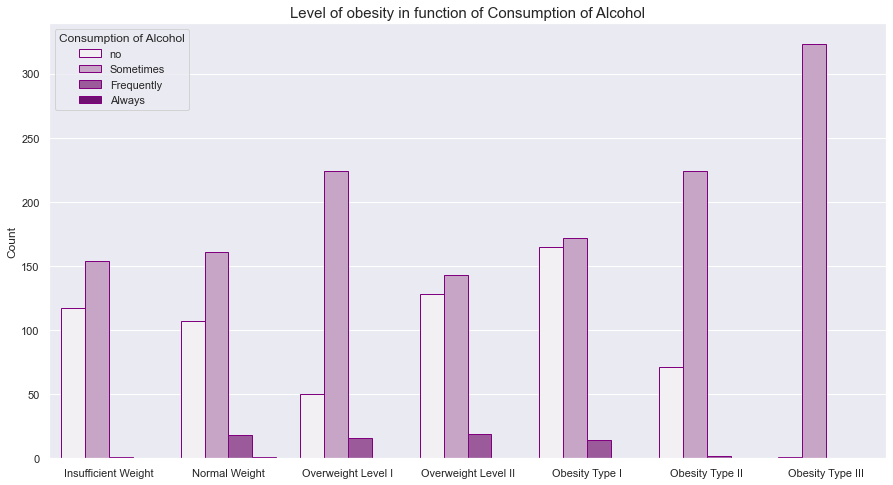

In [26]:
plt.figure(figsize=(15,8))

sns.countplot(x='Level of Obesity',data=df,hue='Consumption of Alcohol',
            order=['Insufficient Weight','Normal Weight','Overweight Level I',
    'Overweight Level II','Obesity Type I','Obesity Type II','Obesity Type III'], color = "purple", edgecolor = 'purple')

plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Level of obesity in function of Consumption of Alcohol',fontsize=15)
plt.show()

Observation & Conclusion:
    
As can be seen from this graph, there is a more or less direct link between the level of obesity and alcohol consumption. Indeed, the more the level of obesity is important, the more the non-consumption of alcohol is rare. However, we can see that this same alcohol consumption is more frequent for those with a normal weight or an overweight. This can be explained by a medical reason: from a certain level of obesity, it becomes dangerous to consume alcohol regularly, hence the disappearance of the 'always' drinkers.

Continuing in the same vein, we are interested here in the correlation between the level of obesity and vegetable consumption.

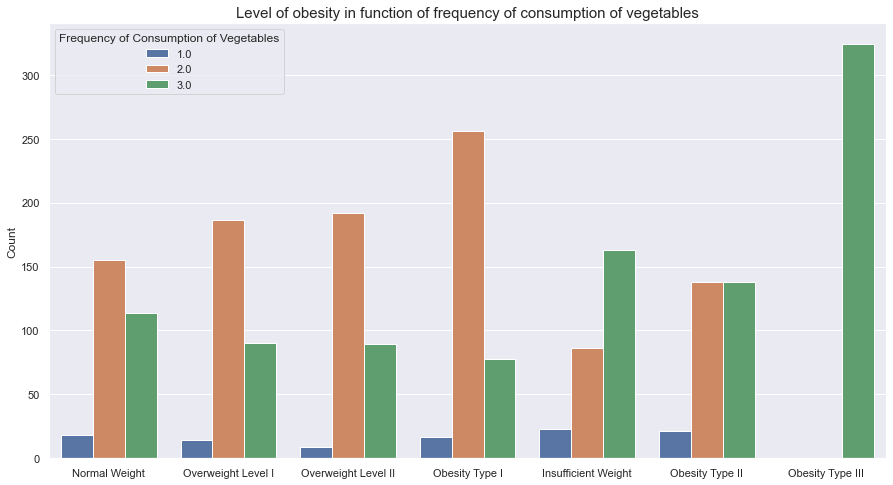

In [27]:
plt.figure(figsize=(15,8))

sns.countplot(x='Level of Obesity',data=df,hue='Frequency of Consumption of Vegetables')
            #order=['Insufficient Weight','Normal Weight','Overweight Level I',])

plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Level of obesity in function of frequency of consumption of vegetables',fontsize=15)
plt.show()

Observation & Conclusion:
    
Here again we can see some relationship, although it may be surprising. We can see very clearly that the consumption of vegetables is much more important for obese people, but also for those in insufficient weight. We can thus observe here two different life habits, between underweight people whose diet relies more on vegetables, and obese people who balance their food with vegetables. Finally, we also notice that the more obese people are, the more vegetables they eat.

We are now investigating whether transportation used can influence the level of obesity.

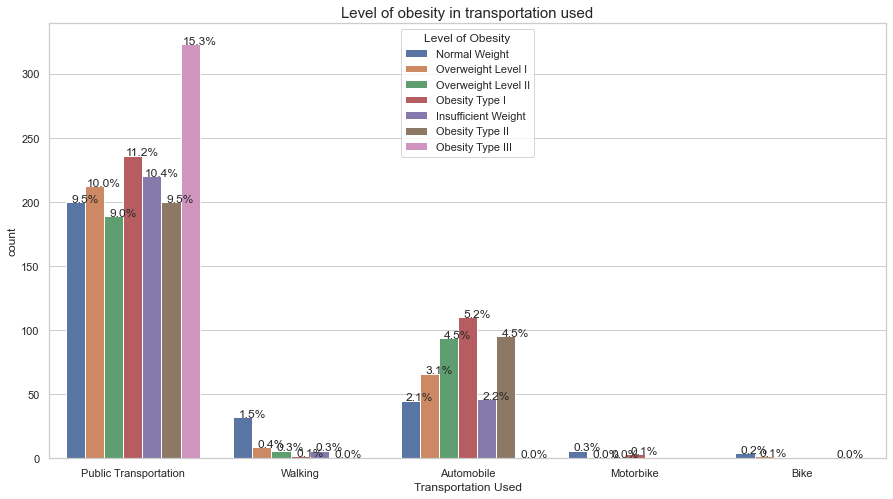

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(df))
cnt = sns.countplot(x='Transportation Used', data=df, hue='Level of Obesity')
plt.title('Level of obesity in transportation used', fontsize=15)
for p in cnt.patches:
    percent = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    cnt.annotate(percent, (x, y), ha='center')
plt.show()

Observation & Conclusion:

We can see from this graph that public transport is the preferred means of transport for our group of people. Even if the people who use it seem to be well distributed, we notice that 15% of the people in this dataset who are in Obesity Type III use public transport against an average of 10% for the other people. 
We can therefore ask ourselves if public transport does not favour obesity.

An important information that this graph shows is that most of the people who walk are of normal weight. This seems logical and it allows us to show that favouring walking over other public transport is really interesting.

--------------------------------------------------------------------------------------------

Through this data visualization, we were able to observe the correlations between the variables, select our target variable as well as the variables we will have to take into account for the modeling.

### 4) Modeling
After we are done visualizing our data, it is time to see the correlations and accurency of different models to optimize and better understand our data set. To do this, we will use Machine Learning concepts to try to understand which model is the best and allows us to understand and exploit our data.

First, we need to separate our data set into two sub-data sets: the training set and the testing set, which we will then use to test our models.

In [29]:
dft = dfe.copy()

dft = dft.drop('Weight',axis = 1)
dft = dft.drop('Height',axis = 1)

Train, Test = train_test_split(dft, test_size=0.3, random_state=0)

X_train = Train.drop('Level of Obesity', axis = 1)
X_test = Test.drop('Level of Obesity', axis = 1)
Y_train = Train["Level of Obesity"]
Y_test = Test["Level of Obesity"]
                               
print("X_Train_set", X_train.shape)
print("X_Test_set", X_test.shape)
print("Y_train set", Y_train.shape)
print("Y_test set", Y_test.shape)

X_Train_set (1477, 15)
X_Test_set (634, 15)
Y_train set (1477,)
Y_test set (634,)


We first create a dictionary containing all the models we want to test, which we will use in our test later.

In [30]:
Dico_Model = {
    'KNN': KNeighborsClassifier(n_neighbors = 5),
    'SVC': SVC(kernel="rbf", C=0.025, probability=True),
    'DECISION TREE': DecisionTreeClassifier(),
    'RANDOM FOREST': RandomForestClassifier(),
    'ADA BOOST': AdaBoostClassifier(),
    'GRADIENT BOOSTING': GradientBoostingClassifier(),
    'SGD': SGDClassifier()
             }

Then, we create an evaluation function that will allow us to obtain for each model 3 elements that will allow us to analyze the reliability of our model:
- The confusion matrix: It will not only highlight the correct and incorrect predictions but will also give us a clue about the type of errors made.

- The classification report: It is used to measure the quality of predictions from a classification algorithm. 
    - 'What percent of your predictions were correct?' The 'Precision' shows the percentage of the classifier that is able to correctly predict the class concerned.     Precision = TP/(TP + FP)
    - 'What percent of the positive cases did you catch?' The 'Recall' is the ability of a classifier to find all positive instances.     Recall = TP/(TP+FN)
    - 'What percent of positive predictions were correct?' The 'F1 Score' is a weighted harmonic mean of precision and recall (between 0 and 1).     F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    - 'Support' is the number of occurence of the choosen class in dataset.
    
- The accuracy : Model accuracy, the most important general indicator

In [31]:
def Eval(model):    
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    acc_m = accuracy_score(Y_test, prediction)
    
    print('Confusion matrix:')
    print(confusion_matrix(Y_test, prediction))
    print('\nClassification report:')  
    print(classification_report(Y_test, prediction))
    print('\nAccuracy:')
    print(acc_m)
    return(acc_m)

Once this is done, we will apply this evaluation to each of the models contained in our model dictionary, making sure to record the accuracy results.

In [32]:
Acc_Models =[]
for name, model in Dico_Model.items():
    print(name, '\n')
    Acc_Models.append(Eval(model))
    print("\n--------------------")
    print('\n')

KNN 

Confusion matrix:
[[ 90   0   0   0   0   0   0]
 [  5  70  11   1   0   0   0]
 [  0   3  74   4   0   0   0]
 [  0   0   3  79   0   0   0]
 [  0   0   0   0 101   2   0]
 [  0   0   0   0   1  89   0]
 [  0   0   0   0   0   0 101]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       0.96      0.80      0.88        87
           2       0.84      0.91      0.88        81
           3       0.94      0.96      0.95        82
           4       0.99      0.98      0.99       103
           5       0.98      0.99      0.98        90
           6       1.00      1.00      1.00       101

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634


Accuracy:
0.9526813880126183

--------------------


SVC 

Confusion matrix:
[[  0  80  10   0   0   0   0]
 [  0  11  45   0  31   0   

C:\Users\lealu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lealu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lealu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[  0  90   0   0   0   0   0]
 [  0  87   0   0   0   0   0]
 [  0   5   0  76   0   0   0]
 [  0   0   0  82   0   0   0]
 [  0   0   0   4  99   0   0]
 [  0   0   0   0  90   0   0]
 [  0   0   0   0 101   0   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.48      1.00      0.65        87
           2       0.00      0.00      0.00        81
           3       0.51      1.00      0.67        82
           4       0.34      0.96      0.50       103
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00       101

    accuracy                           0.42       634
   macro avg       0.19      0.42      0.26       634
weighted avg       0.19      0.42      0.26       634


Accuracy:
0.4227129337539432

--------------------


GRADIENT BOOSTING 



C:\Users\lealu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lealu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lealu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[ 90   0   0   0   0   0   0]
 [  0  86   1   0   0   0   0]
 [  0   3  75   3   0   0   0]
 [  0   0   2  80   0   0   0]
 [  0   0   0   0 102   1   0]
 [  0   0   0   0   4  86   0]
 [  0   0   0   0   0   0 101]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       0.97      0.99      0.98        87
           2       0.96      0.93      0.94        81
           3       0.96      0.98      0.97        82
           4       0.96      0.99      0.98       103
           5       0.99      0.96      0.97        90
           6       1.00      1.00      1.00       101

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


Accuracy:
0.9779179810725552

--------------------


SGD 

Confusion matrix:
[[84  1  5  0  0  0  0]
 [17  7 59  1  0  3  0]
 [ 0  0 63  0  1 

We have thus obtained our results for each model. In order to make it more visual, we draw 2 graphs to allow to understand and observe an overview of our results.

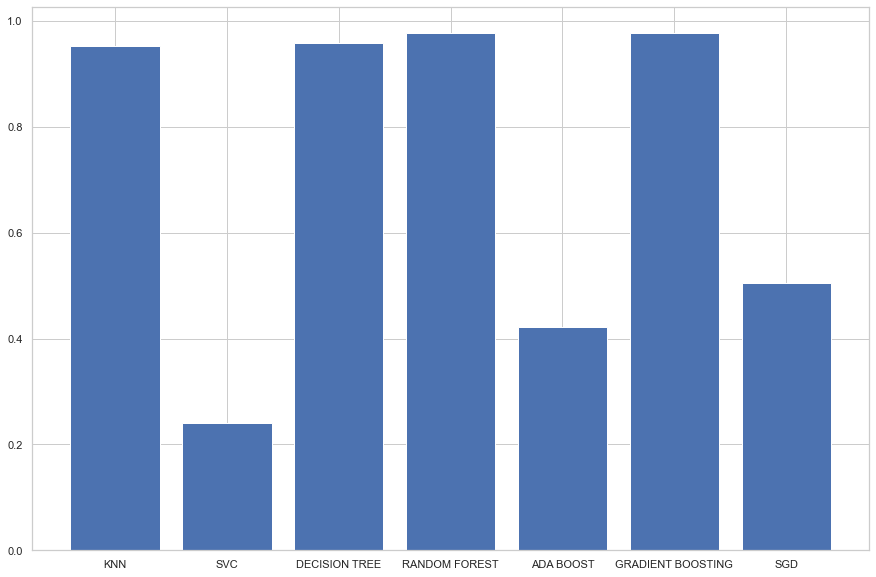

In [33]:
fig_f = plt.figure(figsize=(15, 10))
Name_Models = ['KNN','SVC', 'DECISION TREE', 'RANDOM FOREST', 'ADA BOOST', 'GRADIENT BOOSTING', 'SGD']
plt.bar(Name_Models, Acc_Models)
plt.show()

<AxesSubplot:xlabel='Name', ylabel='Acc'>

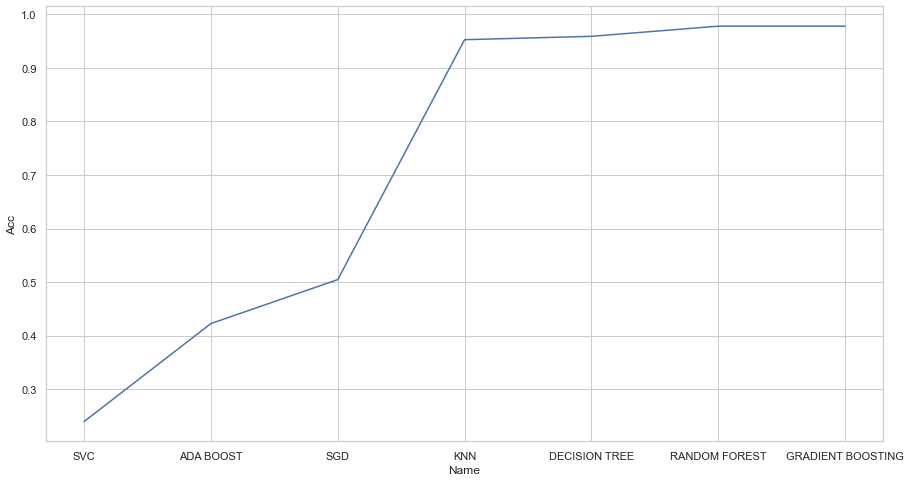

In [34]:
Model_d = pd.DataFrame({'Name':Name_Models, 'Acc':Acc_Models})
Model_d = Model_d.sort_values(by = 'Acc')
sns.lineplot(x='Name', y='Acc', data = Model_d)

#### 4.2) Modeling trials, optimization and to go further
Here we will list/explain all the alternatives, trials, optimization and research done to get the best possible results.

- Trial 1: Variable modifications -> We noticed that some of our modifications in the data pre-processing part improved the efficiency of our models:
    - Rounding the data values of the variables Age, Height, Weight, Frequency of Consumption of Vegetables, Number of Main Meals, Consumption of Water Daily, Physical Activity Frequency, Time using Technology Devices. This significantly improved our results.
    - Creating a BMI variable greatly improved our accuracy, because BMI is another indicator more accurate than the level of Obesity. We therefore gained accuracy in our models.
    
- Trial 2: Remove the columns of variables that do not have much influence on the models. Using the heatmap, we saw that some variables were not specifically representative, and by studying the weight of some variables in our models, we thought that we could remove these columns to try to improve our model. However, after various tests, we saw that this was inconclusive as the accuracy remained about the same but the precision dropped significantly. So we decided not to continue in this way.

- Trial 3: Change the hyper parameters and do a grid search: this is the last optimization we tried and we will detail it below.

We are going to go beyond the default settings with a grid search for DecisionTree.

In [35]:
dtc = DecisionTreeClassifier()
from pprint import pprint
# firstly, we look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dtc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


Then, we apply the gridsearch at some of these parameters throught a function who returns the best parameters found

In [36]:
def dtree_grid_search(X_train, Y_train,nfolds):
    #we create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],
                  'max_depth': range(1, 10), 
                  'min_samples_split': range(2, 10), 
                  'min_samples_leaf': range(1, 10)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #we use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X_train, Y_train)
    print('Best score, best_estimator')
    return dtree_gscv.best_score_, dtree_gscv.best_estimator_

dtree_grid_search(X_train, Y_train, 5)

Best score, best_estimator


(0.9702038479157122,
 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                        min_samples_split=4))

We are now going to do the same method for 2 other classifier: Random Forest and Gradient Boosting.


We are going to use the grid serach for random forest

In [37]:
rfc = RandomForestClassifier()
# firstly, we look at parameters used by our decision tree
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [38]:
def randomForest_grid_search(X_train, Y_train,nfolds):
    #we create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],
                  'max_depth': [4,5,6], 
                  'n_estimators': [100,200, 500],
                   'max_features': ['auto', 'sqrt', 'log2']}
    # random forest model
    rfc_model=RandomForestClassifier()
    #we use gridsearch to test all values
    rfc_gscv = GridSearchCV(rfc_model, param_grid, cv=nfolds)
    #fit model to data
    rfc_gscv.fit(X_train, Y_train)
    print('Best score, best_estimator')
    return rfc_gscv.best_score_, rfc_gscv.best_estimator_

randomForest_grid_search(X_train, Y_train,5)

Best score, best_estimator


(0.9634425103069171,
 RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                        n_estimators=200))

We are going to do the same for the gradient boosting

In [39]:
gbc = GradientBoostingClassifier()
# firstly, we look at parameters used by our gardient boosting
print('Parameters currently in use:\n')
pprint(gbc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [40]:
def gradboosting_grid_search(X_train, Y_train,nfolds):
    #we create a dictionary of all values we want to test
    param_grid = {'criterion':["friedman_mse", "squared_error"],
                  'learning_rate': [0.01,0.05,0.1],
                  "max_depth": [ 3, 4, 5], 
                  } 
    # gradient boosting model
    gbc = GradientBoostingClassifier()
    #we use gridsearch to test all values
    gradboosting_gscv = GridSearchCV(gbc, param_grid, cv=nfolds)
    #fit model to data
    gradboosting_gscv.fit(X_train, Y_train)
    print('Best score, best_estimator')
    return gradboosting_gscv.best_score_, gradboosting_gscv.best_estimator_
gradboosting_grid_search(X_train, Y_train,4)

Best score, best_estimator


(0.9681773236651284,
 GradientBoostingClassifier(criterion='squared_error', max_depth=5))

By comparing the results obtained in this part with the previous modeling, we can see a slight optimization in the accuracy. We have therefore performed a grid search which has allowed us to refine the reliability of our model.